In [1]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from typing import TypedDict

load_dotenv()

model= ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0,
    max_retries=2)

class BlogState(TypedDict):
    topic: str
    outline:str
    content:str
    evaluation:str




In [ ]:

def gen_outline(state:BlogState)->BlogState:
    title= state['topic']
    prompt= f'From the given topic: {title} generate a detailed outline for a blog'
    outline= model.invoke(prompt).content
    state['outline']= outline
    return state

def gen_blog(state:BlogState)->BlogState:
    outline= state['outline']
    title= state['topic']
    prompt= f'from the give topic:{title} and using the following outline \n{outline}\n genrerate a beautiful and detailed blog'
    content=model.invoke(prompt).content
    state['content']= content
    return state

def eval_blog(state:BlogState)->BlogState:
    outline= state['outline']
    blog= state['content']
    prompt= f'based on the give outline \n{outline}\n evaluate this blog \n{blog}'
    eval= model.invoke(prompt).content
    state['evaluation']= eval
    return state


In [4]:
graph= StateGraph(BlogState)

graph.add_node('gen_outline',gen_outline)
graph.add_node('gen_blog',gen_blog)
graph.add_node('eval_blog',eval_blog)

graph.add_edge(START,'gen_outline')
graph.add_edge('gen_outline','gen_blog')
graph.add_edge('gen_blog','eval_blog')
graph.add_edge('eval_blog',END)

workflow= graph.compile()

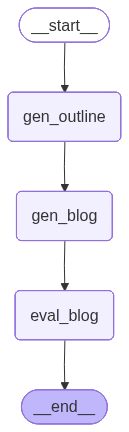

In [5]:
workflow

In [13]:
initial_state= {'topic':'Rise of AI in India.'}
final_state= workflow.invoke(initial_state)
print(final_state['evaluation'])

**Evaluation of the Blog: "The Rise of AI in India: A New Era of Innovation and Growth"**

**Overall Score: 8.5/10**

**Strengths:**

1. **Comprehensive coverage**: The blog provides a thorough overview of the current state of AI in India, covering key topics such as government initiatives, applications, startups, and challenges.
2. **Well-structured**: The blog is well-organized, with each section building on the previous one to provide a cohesive narrative.
3. **Use of examples**: The blog uses relevant examples of AI implementations in India, making the content more engaging and easier to understand.
4. **Future directions**: The blog provides a clear outline of the future directions for the AI industry in India, including the need for increased focus on AI research and development, growing adoption of AI in emerging industries, and development of AI-powered solutions for social impact and sustainability.

**Weaknesses:**

1. **Length**: The blog is quite long, which may deter some 